## Appendix Figure
### Polariton simulation including incoherent pumping

In [1]:
# Import Libraries
import Phonon_Number as pn
import parameters as params

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from IPython.display import clear_output
from scipy.io import savemat, loadmat

In [ ]:
'''
Define and initialize parameters
'''

# Import parameters
G, omega_m, g, gamma, temperature, nth = params.polariton_params()

N = 50                                    # truncation of phonon number basis in qutip

data_points = 30                          # number of data points in arrays
pump = g*np.logspace(-1, 1, data_points)  # in MHz
T2 = g*np.logspace(-1, 1, data_points)    # in MHz

dephasing = 0                             # in MHz
incoherent_pump = 0.01*g                  # in MHz

print('nth = ', nth)

# initialize arrays
incoherent_pump_simulation = np.zeros((len(T2), len(pump)))
coherent_pump_simulation = np.zeros((len(T2), len(pump)))

In [ ]:
'''
Iterating over pump and T2 to calculate simulation values
'''

for i in range(len(pump)):
    for j in range(len(T2)):
        
        # Using simulations
        coherent_pump_simulation[i,j] = pn.polariton_simulation(g, pump[i], T2[j], gamma, dephasing, \
                                                             0, nth, N)
        
        # Using simulations
        incoherent_pump_simulation[i,j] = pn.polariton_simulation(g, pump[i], T2[j], gamma, dephasing, \
                                                               incoherent_pump, nth, N)
        
        # progress monitor
        if(np.mod(i,10) == 0 and np.mod(j,10) == 0):
            print((i/100,j/100))
            
clear_output()
print('Calculations done!')

In [ ]:
'''
Save data into .mat file
'''

polariton_incoherent_pumping = {'G' : G,
                                'omega_m' : omega_m,
                                'data_points' : data_points,
                                'g' : g,
                                'pump' : pump,
                                'T2' : T2,
                                'gamma' : gamma,
                                'dephasing': dephasing,
                                'incoherent_pump': incoherent_pump,
                                'N' : N,
                                'nth' : nth,
                                'incoherent_pump_simulation' : incoherent_pump_simulation,
                                'coherent_pump_simulation' : coherent_pump_simulation
                                }
savemat("./data files/polariton_incoherent_pumping.mat", polariton_incoherent_pumping) # saving data

In [ ]:
'''
Import data
'''

# Import data
polariton_incoherent_pumping = loadmat("./data files/polariton_incoherent_pumping.mat")

g = polariton_incoherent_pumping['g'][0][0]
T2 = polariton_incoherent_pumping['T2']
pump = polariton_incoherent_pumping['pump']

coherent_pump_simulation = polariton_incoherent_pumping['coherent_pump_simulation']
incoherent_pump_simulation = polariton_incoherent_pumping['incoherent_pump_simulation']

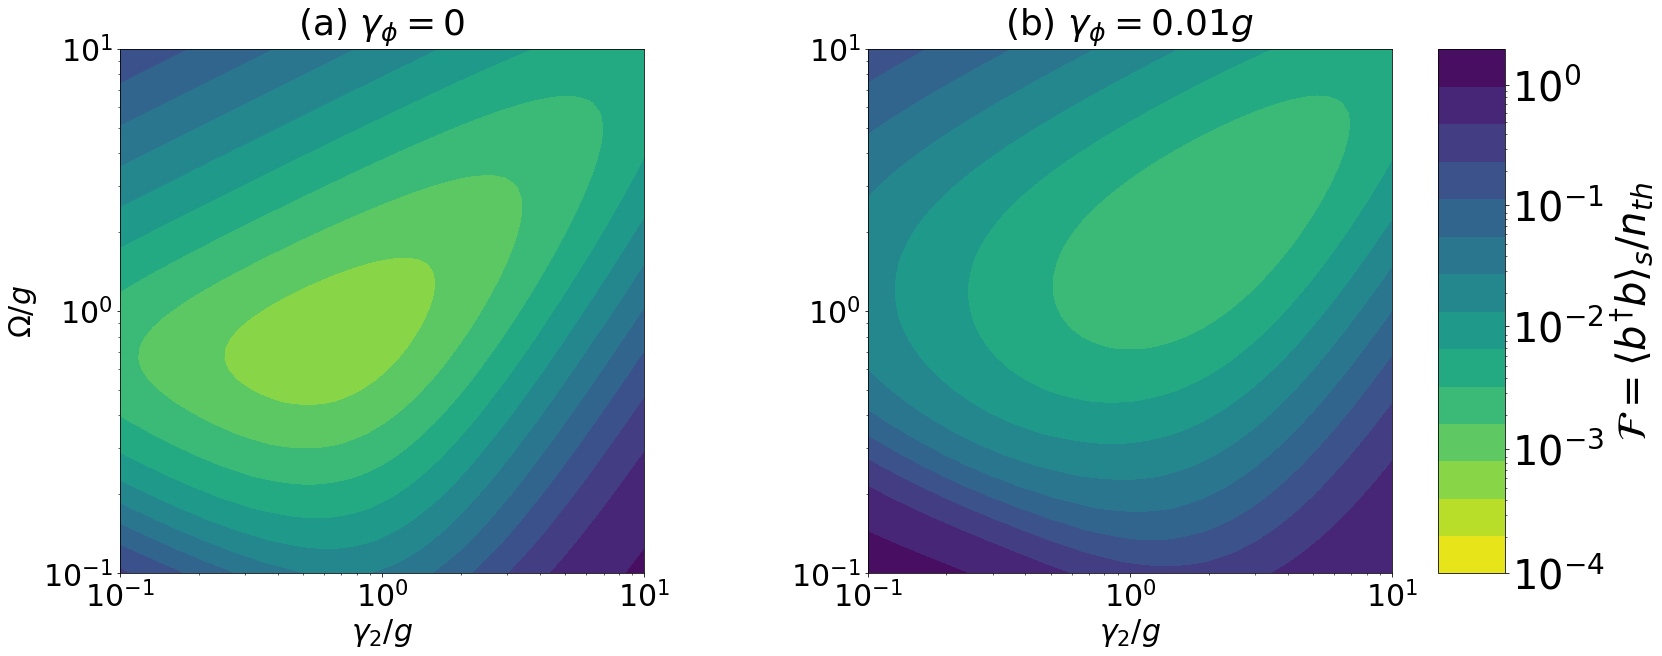

In [30]:
'''
Plotting
'''

# Define plot specifications
fig = plt.figure(constrained_layout=True)
spec = fig.add_gridspec(ncols=2, nrows=1) # subplot grid
[X,Y] = np.meshgrid(T2/g,pump/g) # define X,Y for contour plot
locator = ticker.LogLocator(base=10)
size = coherent_pump_simulation.shape[0]-1

# theory plot
fig.add_subplot(spec[0, 0])
levels = np.logspace(-4, 0.2, 15) # finetune gradation in contour plot
plt.contourf(X,Y, coherent_pump_simulation, locator=ticker.LogLocator(), levels = levels, cmap = 'viridis_r')
# cbar = plt.colorbar(ticks=locator, aspect = 20, shrink = 0.95)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\gamma_2/g$')
plt.ylabel('$\Omega/g$')
plt.title(r'(a) $\gamma_{\phi} = 0$')
ax = plt.gca()
ax.set(adjustable='box', aspect='equal')

# simulation plot
fig.add_subplot(spec[0, 1])
levels = np.logspace(-4, 0.3, 15) # finetune gradation in contour plot
plt.contourf(X,Y, incoherent_pump_simulation, locator=ticker.LogLocator(), levels = levels, cmap = 'viridis_r')
plt.xscale('log')
plt.yscale('log')
# plt.ylabel('$\Omega/g$')
plt.xlabel('$\gamma_2/g$')
plt.title(r'(b) $\gamma_{\phi} = 0.01g$')
ax = plt.gca()
ax.set(adjustable='box', aspect='equal')
plt.rcParams.update({'font.size': 40})
cbar = plt.colorbar(ticks=locator, aspect = 20, shrink = 1)
cbar.set_label(r'$\mathcal{F} = \langle b^{\dagger}b \rangle_s/n_{th}$')

fig = plt.gcf()
fig.set_size_inches((23, 9), forward=False)

fig.savefig('./figures/polariton_incoherent_pumping.pdf')
plt.show()